
## Task 4 - Movie Recommenders

## Instructions

## Task: Build a Movie Recommender system with the following methods:

Popularity

Content Filter

Collaborative Filter

Matrix Factorization

Hybrid

Also, try the following libraries on the dataset:

Turicreate
Surprise
Dataset: MovieLens 20M 

Source: https://grouplens.org/datasets/movielens/20m/

### Import the libraries

In [ ]:
pip install scikit-surprise


In [172]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.algo_base import AlgoBase

In [173]:
column_names = ['MovieID', 'Title', 'Genres']
movies_subset = pd.read_csv('/Users/simranmodi/Desktop/Movie/movies.csv')[:50000]

In [174]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings_subset = pd.read_csv('/Users/simranmodi/Desktop/Movie/ratings.csv')[:100000]

In [175]:
column_names = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code']
tags_subset = pd.read_csv('/Users/simranmodi/Desktop/Movie/tags.csv')[:100000]

### Display the movies data

In [176]:
print("\nMovies Data :")
print("shape : ", movies_subset.shape)
print(movies_subset.head())


Movies Data :
shape :  (50000, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [154]:
movies_subset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
49995,180053,Gutboy: A Badtime Story,(no genres listed)
49996,180055,Crestfallen (2013),Drama|Thriller
49997,180057,Copacabana (2010),Comedy
49998,180059,The Unmatchable Match (1990),Action|Crime


### Display the Ratings data

In [155]:
print("\nRatings Data :")
print("shape : ", ratings_subset.shape)
print(ratings_subset.head())


Ratings Data :
shape :  (100000, 4)
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510


In [156]:
ratings_subset

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
99995,757,2115,3.0,1184014093
99996,757,2117,3.0,1184015776
99997,757,2118,4.0,1184014221
99998,757,2124,3.5,1184073900


### Display the Items data

In [177]:
print("\nTags Data :")
print("shape : ", tags_subset.shape)
print(tags_subset.head())


Tags Data :
shape :  (100000, 4)
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455


In [178]:
tags_subset

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
99995,6550,33755,kaiju,1527372767
99996,6550,33760,bangkok,1527401240
99997,6550,33760,children,1527401240
99998,6550,33760,king,1527401240


In [181]:
from sklearn.model_selection import train_test_split
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)

# Display the shapes of the resulting DataFrames
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (80000, 4)
Testing data shape: (20000, 4)


### Display the Training and Testing Ratings data

In [182]:
train_data.shape, test_data.shape

((80000, 4), (20000, 4))

### How many unique users?

In [183]:
print(ratings_subset.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [184]:
n_users = ratings_subset['movieId'].nunique()
print("Number of unique movies:", n_users)

Number of unique movies: 9786


In [185]:
n_users

9786

### How many unique items / movies?

In [186]:
n_tags = ratings_subset.movieId.unique().shape[0]
n_tags

9786

### Create a User-Item Matrix

In [187]:
from scipy.sparse import csr_matrix

In [188]:
user_movies_data = ratings_subset.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [189]:
user_movies_data

userId,1,2,3,4,5,6,7,8,9,10,...,748,749,750,751,752,753,754,755,756,757
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,4.0,3.0,4.0,0.0,0.0,4.0,0.0,3.5,...,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Content Filtering


### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [190]:
movies_subset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
49995,180053,Gutboy: A Badtime Story,(no genres listed)
49996,180055,Crestfallen (2013),Drama|Thriller
49997,180057,Copacabana (2010),Comedy
49998,180059,The Unmatchable Match (1990),Action|Crime


In [20]:
movies_subset['metadata'] = " "

In [21]:
movies_subset

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,
1,2,Jumanji (1995),Adventure|Children|Fantasy,
2,3,Grumpier Old Men (1995),Comedy|Romance,
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,
4,5,Father of the Bride Part II (1995),Comedy,
...,...,...,...,...
49995,180053,Gutboy: A Badtime Story,(no genres listed),
49996,180055,Crestfallen (2013),Drama|Thriller,
49997,180057,Copacabana (2010),Comedy,
49998,180059,The Unmatchable Match (1990),Action|Crime,


In [159]:
Action = movies_subset[movies_subset['genres'] == 'Action']
Action

,movieId,title,genres
8,9,Sudden Death (1995),Action
70,71,Fair Game (1995),Action
202,204,Under Siege 2: Dark Territory (1995),Action
248,251,"Hunted, The (1995)",Action
656,667,Bloodsport 2 (a.k.a. Bloodsport II: The Next K...,Action
...,...,...,...
49587,179193,Enter the Game of Death (1978),Action
49616,179255,The Duel of the Century (1981),Action
49618,179259,Sleepy Eyes of Death 4: Sword of Seduction (1964),Action
49884,179821,Acts of Vengeance (2017),Action


In [23]:
print(movies_subset.columns)

Index(['movieId', 'title', 'genres', 'metadata'], dtype='object')


In [160]:
Action = movies_subset[movies_subset['genres'] == 'Action']
print(Action)



       movieId                                              title  genres
8            9                                Sudden Death (1995)  Action
70          71                                   Fair Game (1995)  Action
202        204               Under Siege 2: Dark Territory (1995)  Action
248        251                                 Hunted, The (1995)  Action
656        667  Bloodsport 2 (a.k.a. Bloodsport II: The Next K...  Action
...        ...                                                ...     ...
49587   179193                     Enter the Game of Death (1978)  Action
49616   179255                     The Duel of the Century (1981)  Action
49618   179259  Sleepy Eyes of Death 4: Sword of Seduction (1964)  Action
49884   179821                           Acts of Vengeance (2017)  Action
49899   179851                                    Stingray (1978)  Action

[462 rows x 3 columns]


In [161]:
movies_subset['Action'] = (movies_subset['genres'] == 'Action').astype(int)
print(movies_subset['Action'])


0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Action, Length: 50000, dtype: int64


In [162]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "
movies_subset['metadata_Action'] = movies_subset.Action.apply(metadata_Action)   

In [27]:
movies_subset

,movieId,title,genres,metadata,Action,metadata_Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,,0,
1,2,Jumanji (1995),Adventure|Children|Fantasy,,0,
2,3,Grumpier Old Men (1995),Comedy|Romance,,0,
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,0,
4,5,Father of the Bride Part II (1995),Comedy,,0,
...,...,...,...,...,...,...
49995,180053,Gutboy: A Badtime Story,(no genres listed),,0,
49996,180055,Crestfallen (2013),Drama|Thriller,,0,
49997,180057,Copacabana (2010),Comedy,,0,
49998,180059,The Unmatchable Match (1990),Action|Crime,,0,


In [28]:
movies_subset['Drama'] = (movies_subset['genres'] == 'Drama').astype(int)
print(movies_subset['Drama'])


0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Drama, Length: 50000, dtype: int64


In [163]:
def metadata_Drama(x):
    if x == 1:
        return "Drama"
    else:
        return " "
movies_subset['metadata_Drama'] = movies_subset.Action.apply(metadata_Drama)  

In [31]:
genres = ['Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [238]:
def get_genres(series):
    return series['Genres'].replace("|", " ")

In [239]:
movies['Meta_Data'] = movies.apply(get_genres, axis=1)
movies

,MovieID,Title,Genres,Meta_Data
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation Children's Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Comedy
3879,3949,Requiem for a Dream (2000),Drama,Drama
3880,3950,Tigerland (2000),Drama,Drama
3881,3951,Two Family House (2000),Drama,Drama


## TF-IDF Vectorizer

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_subset['title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=movies_subset.index.tolist())
print(tfidf_df.shape)

(50000, 29766)


In [240]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,29756,29757,29758,29759,29760,29761,29762,29763,29764,29765
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


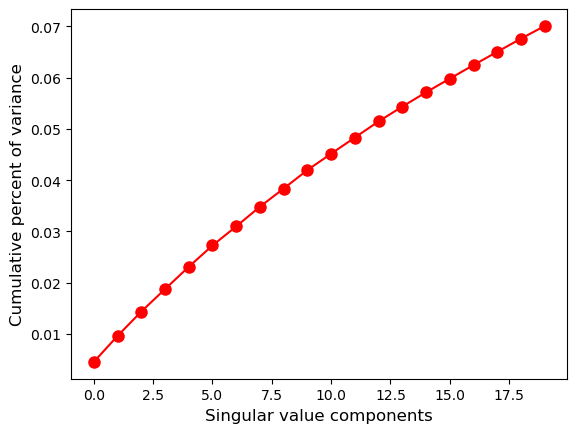

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
latent_matrix_1 = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()

In [37]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix_1[:len(movies_subset), 0:n], index=movies_subset['title'].tolist())

In [225]:
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Toy Story (1995),0.014460,0.004169,0.006937,0.011887,0.008057,0.008117,0.013011,0.007546,0.010167,0.008083,0.018700,0.008753,0.005641,0.038395,-0.009483,0.041579,0.002429,0.004100,-0.011546,0.003995
Jumanji (1995),0.002774,0.000769,0.002162,0.002321,0.001570,0.002447,0.005509,0.001882,0.003232,0.003810,0.008345,0.004539,0.001683,0.012267,-0.000903,0.039202,0.002894,0.007929,-0.002410,0.005044
Grumpier Old Men (1995),0.011018,0.003247,0.005865,0.006764,0.005287,0.005432,0.009554,0.003710,0.005309,0.003879,0.012343,0.003310,0.004143,0.009982,0.003598,0.039097,-0.000854,0.007120,-0.005196,0.009744
Waiting to Exhale (1995),0.003035,0.000679,0.002876,0.002239,0.002833,0.001893,0.005342,0.003759,0.003175,0.002659,0.007788,0.002990,0.003176,0.010765,-0.000940,0.031742,0.002040,0.006633,-0.000446,0.005150
Father of the Bride Part II (1995),0.009161,0.003531,0.006676,0.006640,0.005079,0.007334,0.010573,0.003870,0.009848,0.005924,0.014968,0.007807,0.005692,0.015727,0.004877,0.040590,0.005468,0.012759,-0.005634,0.009884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gutboy: A Badtime Story,0.007432,0.002606,0.003306,0.006142,0.004362,0.003499,0.005035,0.003209,0.004982,0.003041,0.007435,0.003569,0.002307,0.017977,-0.006187,0.001036,-0.001049,-0.002904,-0.006408,-0.000786
Crestfallen (2013),0.027250,0.012616,0.032864,0.340449,-0.091812,-0.030056,-0.023952,-0.008575,-0.014310,-0.007541,-0.015505,-0.007353,-0.005276,-0.015864,0.003086,-0.012346,0.003341,0.001732,0.003632,0.003448
Copacabana (2010),0.010687,0.004364,0.008424,0.014148,0.015748,0.019704,0.135103,0.354848,-0.058690,-0.025198,-0.029174,-0.012093,-0.008112,-0.022009,0.004404,-0.014054,0.003416,0.001584,0.003867,0.003214
The Unmatchable Match (1990),0.003629,0.000605,0.001878,0.003033,0.002077,0.000731,0.001838,-0.000129,0.002699,0.003041,0.005502,0.004280,0.000909,0.007172,0.003777,0.010246,0.005309,0.007846,-0.010665,-0.010447


In [38]:
latent_matrix_1_df.shape

(50000, 20)

## 2. Collaborative Filtering


In [39]:
from sklearn.decomposition import TruncatedSVD
from surprise.model_selection import train_test_split
import pandas as pd

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD(n_factors=20, random_state=42)
svd_model.fit(trainset)

latent_matrix_2 = svd_model.pu

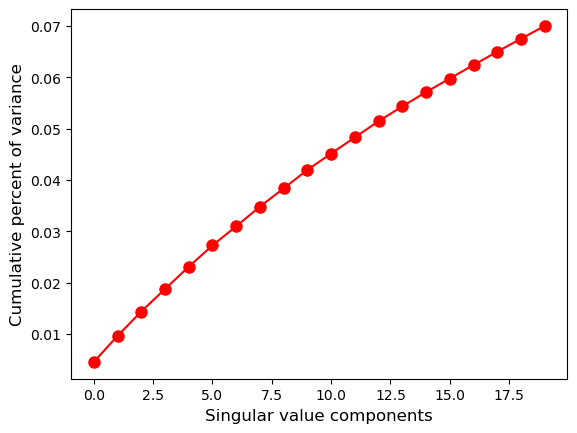

In [40]:
latent_matrix_2 = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()

In [43]:
n = 19
latent_matrix_2_df = pd.DataFrame(latent_matrix_2[:, :n], index=ratings_subset['movieId'][:50000].tolist())

In [44]:
latent_matrix_2_df.shape

(50000, 19)

In [45]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
296,0.014570,0.004160,0.006328,0.012150,0.007778,0.005771,0.010786,0.007821,0.015019,0.010393,0.018009,0.007481,0.011983,0.028382,0.011676,0.037432,0.002947,-0.037369,0.040081
306,0.002868,0.000778,0.001659,0.002598,0.001396,0.000139,0.003508,0.002457,0.007688,0.006145,0.007977,0.004026,0.008110,0.003348,0.020092,0.034632,0.003653,-0.030804,0.039266
307,0.011122,0.003206,0.005554,0.006989,0.005074,0.003705,0.008223,0.004194,0.008558,0.005966,0.012101,0.001782,0.008226,0.002464,0.019935,0.039901,0.001732,-0.026287,0.034336
665,0.003111,0.000686,0.002468,0.002450,0.002698,0.000058,0.003718,0.004199,0.006712,0.004560,0.007533,0.002676,0.008236,0.003442,0.015640,0.028213,0.002595,-0.023829,0.033830
899,0.009280,0.003555,0.006204,0.006859,0.004850,0.005429,0.009135,0.004106,0.013490,0.007855,0.014802,0.006400,0.010134,0.008188,0.021646,0.039478,0.006338,-0.023461,0.033875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99007,0.007440,0.002596,0.003233,0.006137,0.004295,0.003485,0.004902,0.002980,0.005250,0.002999,0.007190,0.003009,0.002293,0.017273,-0.006001,0.001130,-0.001378,-0.004337,-0.000225
99728,0.027252,0.012622,0.032808,0.340438,-0.091803,-0.030231,-0.023950,-0.008549,-0.014154,-0.007839,-0.015365,-0.007410,-0.005473,-0.015848,0.005050,-0.011404,0.004562,0.001391,0.005019
101577,0.010723,0.004361,0.008376,0.014119,0.015724,0.019992,0.135780,0.354546,-0.057953,-0.025781,-0.028994,-0.012028,-0.008256,-0.021924,0.006656,-0.013541,0.004869,0.000600,0.004980
101962,0.003807,0.000840,0.001595,0.003043,0.001526,-0.000018,0.002229,0.000867,0.001598,0.001809,0.004739,0.002160,-0.003051,0.009698,-0.002376,0.018711,-0.005296,0.009967,-0.012207


## 3. Hybrid Recommendation System

In [120]:
class Hybrid(AlgoBase):
    def __init__(self, svd_model, knn_model, sim_options={}, bsl_options={}, verbose=True):
        AlgoBase.__init__(self, sim_options=sim_options, bsl_options=bsl_options, verbose=verbose)
        self.svd_model = svd_model
        self.knn_model = knn_model

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        self.svd_model.fit(trainset)
        self.knn_model.fit(trainset)
        return self

    def estimate(self, u, i):
        svd_prediction = self.svd_model.predict(u, i).est
        knn_prediction = self.knn_model.predict(u, i).est
        return (svd_prediction + knn_prediction) / 2

knn_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
svd_model = SVD(n_factors=50, random_state=42)

hybrid_model = Hybrid(svd_model, knn_model)
hybrid_model.fit(trainset)


test_predictions = hybrid_model.test(testset)
accuracy.rmse(test_predictions, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1123


1.1123037214349232

In [231]:
def recommend_similar_movies(movie_title, movies, latent_matrix, tfidf_vectorizer):
    # Get the index of the provided movie title
    movie_indices = movies.index[movies['title'] == movie_title].tolist()

    if not movie_indices:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []

    idx = movie_indices[0]
    
    cosine_similarities = cosine_similarity(latent_matrix, latent_matrix[idx].reshape(1, -1)).flatten()

    similar_movies_indices = cosine_similarities.argsort()[::-1]

    similar_movies_indices = [i for i in similar_movies_indices if i != idx]

    if len(similar_movies_indices) < 5:
        print("Not enough movies in the dataset for recommendations.")
        return []

    similar_movies_indices = similar_movies_indices[:5]
    similar_movies = movies.iloc[similar_movies_indices]['title'].tolist()
    return similar_movies

In [232]:
similar_movies = recommend_similar_movies("Toy Story (1995)", movies_subset, latent_matrix_1, tfidf)
print("Recommended movies for Toy Story (1995):")
for movie in similar_movies:
    print(movie)


Recommended movies for Toy Story (1995):
Lilian's Story (1995)
Splendor in the Grass (1961)
Mark, The (1961)
The Count of Monte Cristo (1954)
The Count of Monte Cristo (1961)


In [233]:
similar_movies = recommend_similar_movies(("GoldenEye (1995)"), movies_subset, latent_matrix_1, tfidf)
print("Recommended movies for GoldenEye (1995)")
for movie in similar_movies:
    print(movie)

Recommended movies for GoldenEye (1995)
Takkar (1995)
Sugartime (1995)
Virtuosity (1995)
Pocahontas (1995)
Clockers (1995)


In [234]:
similar_movies = recommend_similar_movies(("Mission: Impossible (1996)"), movies_subset, latent_matrix_1, tfidf)
print("Recommended movies for Mission: Impossible (1996)")
for movie in similar_movies:
    print(movie)

Recommended movies for Mission: Impossible (1996)
Sharpe's Mission (1996)
Phat Beach (1996)
Breaking the Waves (1996)
Moving Target (1996)
She Cried No (Freshman Fall) (1996)


## 4. Popularity Recommendation

In [93]:
import pandas as pd

In [235]:
average_ratings = ratings_subset.groupby('movieId')['rating'].mean()

popularity_recommendations = average_ratings.sort_values(ascending=False).index

movies_titles = movies_subset[['movieId', 'title']]
popularity_recommendations = pd.merge(pd.DataFrame(popularity_recommendations, columns=['movieId']), movies_titles, on='movieId')['title']


In [236]:
print("Popularity Recommendations (based on average ratings):")
print(popularity_recommendations)

Popularity Recommendations (based on average ratings):
0          Winter in Prostokvashino (1984)
1          Phish: Bittersweet Motel (2000)
2                      Bikini Beach (1964)
3                        Black Moon (1975)
4                    Last Days, The (1998)
                       ...                
9543           From Justin to Kelly (2003)
9544                          Gigli (2003)
9545    Oh Boy (A Coffee in Berlin) (2012)
9546           Handmaid's Tale, The (1990)
9547                 Daddy Day Camp (2007)
Name: title, Length: 9548, dtype: object


In [237]:
print(popularity_recommendations.head(25))

0                       Winter in Prostokvashino (1984)
1                       Phish: Bittersweet Motel (2000)
2                                   Bikini Beach (1964)
3                                     Black Moon (1975)
4                                 Last Days, The (1998)
5                                I, Frankenstein (2014)
6                  Americanization of Emily, The (1964)
7                          Milagro Beanfield War (1988)
8                              Twisted Seduction (2010)
9     Affair of Love, An (Liaison pornographique, Un...
10                              A Song of Lisbon (1933)
11                                  Grey Gardens (1975)
12                          O Pátio das Cantigas (1942)
13                                         Dolls (2002)
14    Guest from the Future (Gostya iz buduschego) (...
15                                     Pool, The (2007)
16    King and the Mockingbird, The (Le roi et l'ois...
17                             Rabbit of Seville

In [102]:
user_ids = [1, 2, 3, 4, 5]
user_recommendations = pd.DataFrame({'userId': [], 'movieId': []})

for user_id in user_ids:
    user_recommendations = pd.concat([user_recommendations, pd.DataFrame({'userId': [user_id] * len(popularity_recommendations), 'movieId': popularity_recommendations.tolist()})])


In [103]:
print("User-specific Recommendations (Popularity-based):")
print(user_recommendations)


User-specific Recommendations (Popularity-based):
      userId                             movieId
0        1.0     Winter in Prostokvashino (1984)
1        1.0     Phish: Bittersweet Motel (2000)
2        1.0                 Bikini Beach (1964)
3        1.0                   Black Moon (1975)
4        1.0               Last Days, The (1998)
...      ...                                 ...
9543     5.0         From Justin to Kelly (2003)
9544     5.0                        Gigli (2003)
9545     5.0  Oh Boy (A Coffee in Berlin) (2012)
9546     5.0         Handmaid's Tale, The (1990)
9547     5.0               Daddy Day Camp (2007)

[47740 rows x 2 columns]


## Turicreate - Python Library for easy recommendation engine building

In [50]:
#! pip install turicreate

### Import the library

In [ ]:
import turicreate

### Create a SFrame for training and testing data

In [ ]:
train_data = turicreate.SFrame(ratings_train)
test_data = turicreate.SFrame(ratings_test)

### Popularity Recommender - Cold Start problem

In [ ]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating')

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

In [ ]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

### Insights ??

-
-

### Item Similarity Recommender
#### Training the model

In [ ]:
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

#### Making recommendations for users 1, 2, 3, 4, 5

In [ ]:
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

### Insights ?
-
-

# 5. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [202]:
import numpy as np
class MF():

    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])


    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction


    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [203]:
R= np.array(ratings_subset.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0))

In [204]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 274.5387
Iteration: 40 ; error = 267.9934
Iteration: 60 ; error = 263.6077
Iteration: 80 ; error = 258.6406
Iteration: 100 ; error = 251.2497

P x Q:
[[3.99087746 3.48433022 3.42926955 ... 3.65645925 3.72497005 3.54362594]
 [3.70915676 3.33477895 3.14474573 ... 3.45305372 3.49125721 3.35283223]
 [4.00825816 3.48706924 3.41912295 ... 3.67273047 3.71630797 3.5733845 ]
 ...
 [4.04158268 3.54345071 3.53102287 ... 3.72251033 3.74003557 3.60048803]
 [3.80862522 3.22333598 3.23003786 ... 3.36275333 3.45581281 3.32732412]
 [3.80908025 3.3092181  3.21413262 ... 3.46619529 3.47786224 3.36349648]]



## Surprise

In [207]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [208]:
ratings_subset

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
99995,757,2115,3.0,1184014093
99996,757,2117,3.0,1184015776
99997,757,2118,4.0,1184014221
99998,757,2124,3.5,1184073900


In [209]:
tags_subset

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
99995,6550,33755,kaiju,1527372767
99996,6550,33760,bangkok,1527401240
99997,6550,33760,children,1527401240
99998,6550,33760,king,1527401240


In [212]:
mapping_movie_file = dict(zip(movies['Title'], movies['MovieID']))
mapping_movie_file

{'Toy Story (1995)': 1,
 'Jumanji (1995)': 2,
 'Grumpier Old Men (1995)': 3,
 'Waiting to Exhale (1995)': 4,
 'Father of the Bride Part II (1995)': 5,
 'Heat (1995)': 6,
 'Sabrina (1995)': 7,
 'Tom and Huck (1995)': 8,
 'Sudden Death (1995)': 9,
 'GoldenEye (1995)': 10,
 'American President, The (1995)': 11,
 'Dracula: Dead and Loving It (1995)': 12,
 'Balto (1995)': 13,
 'Nixon (1995)': 14,
 'Cutthroat Island (1995)': 15,
 'Casino (1995)': 16,
 'Sense and Sensibility (1995)': 17,
 'Four Rooms (1995)': 18,
 'Ace Ventura: When Nature Calls (1995)': 19,
 'Money Train (1995)': 20,
 'Get Shorty (1995)': 21,
 'Copycat (1995)': 22,
 'Assassins (1995)': 23,
 'Powder (1995)': 24,
 'Leaving Las Vegas (1995)': 25,
 'Othello (1995)': 26,
 'Now and Then (1995)': 27,
 'Persuasion (1995)': 28,
 'City of Lost Children, The (1995)': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30,
 'Dangerous Minds (1995)': 31,
 'Twelve Monkeys (1995)': 32,
 'Wings of Courage (1995)': 33,
 'Babe (1995)

In [222]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_subset[['userId','movieId','rating']], reader)

trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8823


0.8823326893192711

In [214]:
def pred_user_rating(ui):
    if ui in ratings_subset.userId.unique():
        ui_list = ratings_subset[ratings_subset.userId == ui].movieId.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}
        predictedL = []
        for i, j in d.items():
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3]))
        pdf = pd.DataFrame(predictedL, columns = ['movies_subset', 'ratings_subset'])
        pdf.sort_values('ratings_subset', ascending=False, inplace=True)
        pdf.set_index('movies_subset', inplace=True)
        return pdf.head(10)
    else:
        print("User Id does not exist in the list!")
        return None

In [215]:
userId = 1
pred_user_rating(userId)

,ratings_subset
movies_subset,
simply terrific,4.57115
a great adaptation of the Stephen King book,4.57115
touching story,4.57115
innocent person on the run,4.57115
Tim Robbins,4.57115
best-movie,4.57115
i do not like tim robbins.,4.57115
i do not understand why people like this movie so much.,4.57115
"the movie is okay, not great, not artsy enough.",4.57115


In [216]:
pred_user_rating(50)

,ratings_subset
movies_subset,
WITNESS PROTECTION,5.0
MAFIA LIFE,5.0
slapstick violence,5.0
antique,5.0
carjacking,5.0
cocktail,5.0
hatchet,5.0
crime epic,5.0
tampa,5.0


In [217]:
pred_user_rating(49)

,ratings_subset
movies_subset,
love this movie,5.0
family bonds,5.0
bloody body of child,5.0
World War II,5.0
man punches woman,5.0
touching story,5.0
wallace & gromit,5.0
sheep rustling,5.0
Leonardo DiCaprio,5.0


In [218]:
pred_user_rating(2)

,ratings_subset
movies_subset,
non-linear,4.960373
raw,4.960373
biblical references,4.960373
quentin tarantino,4.960373
Tarantino,4.960373
Black comedy,4.960373
pulp,4.960373
uma thurman,4.960373
heirloom,4.960373


In [219]:
pred_user_rating(4)

,ratings_subset
movies_subset,
Benicio Del Toro,4.333427
tricky,4.333427
visceral,4.321867
harsh,4.321867
Martin Scorsese,4.321867
FORBIDDEN LOVE,4.297834
graduate,4.297834
rape accusation,4.297834
Dustin Hoffman,4.297834


In [220]:
pred_user_rating(49)

,ratings_subset
movies_subset,
love this movie,5.0
family bonds,5.0
bloody body of child,5.0
World War II,5.0
man punches woman,5.0
touching story,5.0
wallace & gromit,5.0
sheep rustling,5.0
Leonardo DiCaprio,5.0


In [221]:
pred_user_rating(91)

,ratings_subset
movies_subset,
heartbreaking,4.557351
grief porn,4.557351
WWII,4.557351
great story,4.557351
ambiguous character alignments,4.454644
territory,4.454644
pan,4.454644
didactic,4.454644
visualy apealing,4.454644
